# Study of weight evolution

In [1]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

from network import run_network_recall, train_network

## Evolution in time

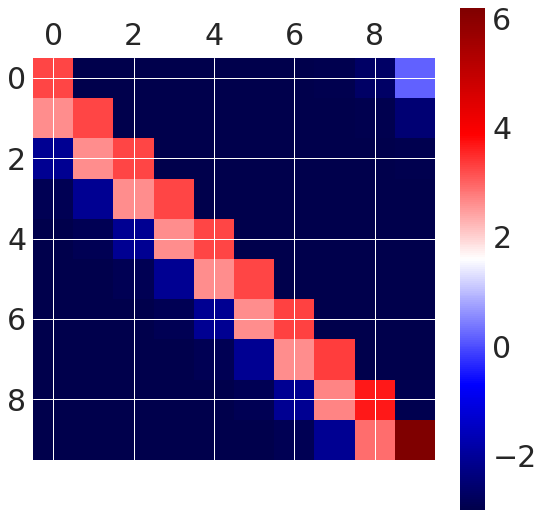

In [7]:
N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100

training_time = 0.100
inter_sequence_time = 0.000
dt = 0.001
sequence1 = [0, 1, 2, 3]
sequence2 = [4, 5, 6, 7, 8, 9]
sequences = [sequence1, sequence2]

dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                    tau_z_post, tau_w, epochs=10, max_w=10.0, min_w=-3.0, save_w_history=True)

w = dic['w']
x_total = dic['x']
z_history = dic['z']
z_post_history = dic['z_post']
w_history = dic['w_history']

plt.matshow(w, cmap='seismic')
plt.colorbar();

Let's see how the weights from 0 to 1 and from 1 to 0 evolve in time

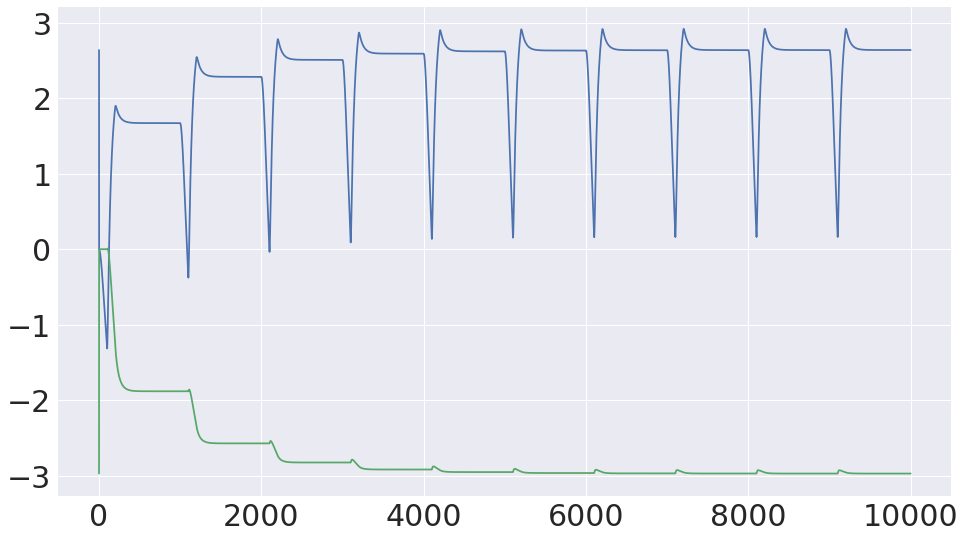

In [8]:
w_10 = w_history[:, 1, 0]
w_01 = w_history[:, 0, 1]

plt.plot(w_10)
plt.plot(w_01);

#### Effect of the time constant

In [9]:
tau_w_vector = [0.010, 0.050, 0.100, 0.500]
w_saved = []

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100

training_time = 0.100
inter_sequence_time = 0.000
dt = 0.001
sequence1 = [0, 1, 2, 3]
sequence2 = [4, 5, 6, 7, 8, 9]
sequences = [sequence1, sequence2]

for tau_w in tau_w_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=10, max_w=10.0, min_w=-3.0, save_w_history=True)

    w = dic['w']
    x_total = dic['x']
    z_history = dic['z']
    z_post_history = dic['z_post']
    w_history = dic['w_history']

    w_saved.append(np.copy(w_history))

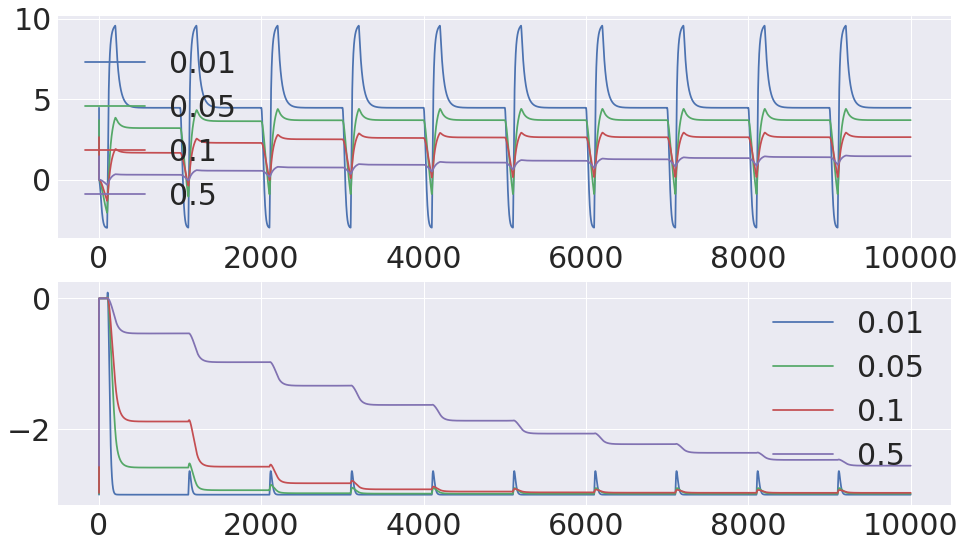

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


for w_history, tau_w in zip(w_saved, tau_w_vector):

    w_10 = w_history[:, 1, 0]
    w_01 = w_history[:, 0, 1]

    ax1.plot(w_10, label=str(tau_w))
    ax2.plot(w_01, label=str(tau_w))

ax2.legend()
ax1.legend();

## Efect of training time
Let' see what hapepns with the weights depending on the training time

In [15]:
training_times_vector = [0.050, 0.100, 0.300, 0.500]
w_saved = []

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100

training_time = 0.100
inter_sequence_time = 0.000
dt = 0.001
sequence1 = [0, 1, 2, 3]
sequence2 = [4, 5, 6, 7, 8, 9]
sequences = [sequence1, sequence2]

for training_time in training_times_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=10.0, min_w=-3.0, save_w_history=True)

    w = dic['w']
    x_total = dic['x']
    z_history = dic['z']
    z_post_history = dic['z_post']
    w_history = dic['w_history']

    w_saved.append(np.copy(w_history))

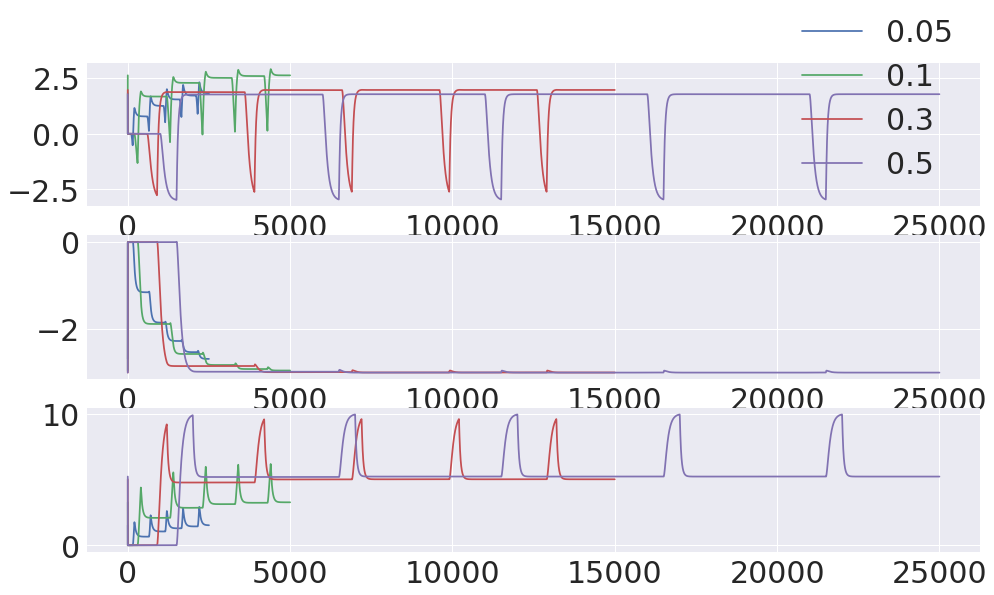

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)


for w_history, training_time in zip(w_saved, training_times_vector):
    
    w_33 = w_history[:, 3, 3]
    w_32 = w_history[:, 3, 2]
    w_23 = w_history[:, 2, 3]

    ax1.plot(w_32, label=str(training_time))
    ax2.plot(w_23, label=str(training_time))
    ax3.plot(w_33, label=str(training_time))

ax1.legend();

In [26]:
training_times_vector = np.arange(0.050, 1.050, 0.050)
w_self = []
w_transition = []
w_inhition = []
pattern = 3
pattern_from = 2

N = 10
tau_z = 0.050
tau_z_post = 0.005
tau_w = 0.100

training_time = 0.100
inter_sequence_time = 0.000
dt = 0.001
sequence1 = [0, 1, 2, 3]
sequence2 = [4, 5, 6, 7, 8, 9]
sequences = [sequence1, sequence2]

for training_time in training_times_vector:

    dic = train_network(N, dt, training_time, inter_sequence_time, sequences, tau_z,
                        tau_z_post, tau_w, epochs=5, max_w=10.0, min_w=-3.0, save_w_history=False)

    w = dic['w']
    w_self.append(w[pattern, pattern])
    w_transition.append(w[pattern, pattern_from])
    w_inhition.append(w[pattern_from, pattern])

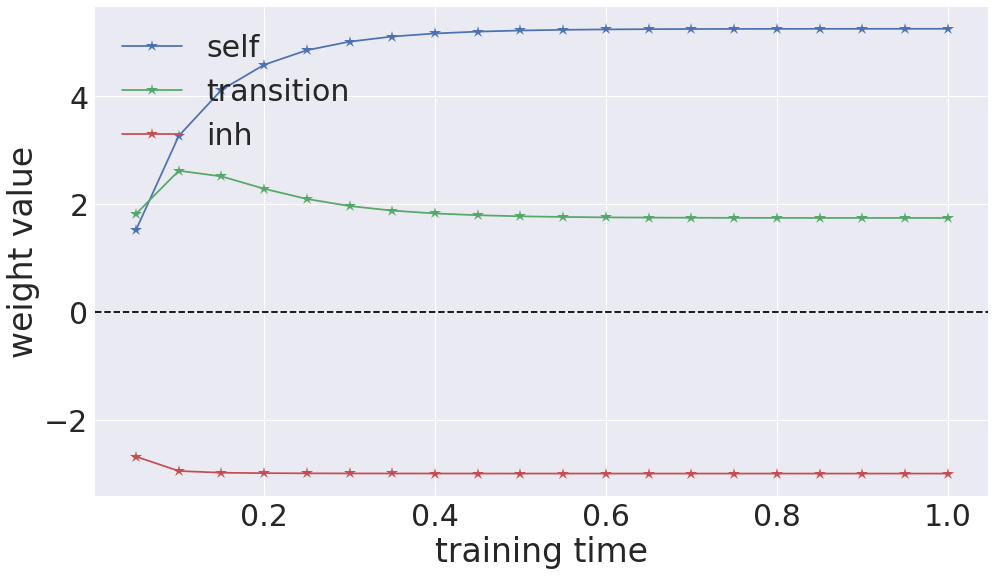

In [30]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(training_times_vector, w_self, '*-', markersize=13, label='self')
ax1.plot(training_times_vector, w_transition, '*-', markersize=13, label='transition')
ax1.plot(training_times_vector, w_inhition, '*-', markersize=13, label='inh')

ax1.axhline(0, ls='--', color='black')

ax1.set_xlabel('training time')
ax1.set_ylabel('weight value')
ax1.legend();